<a href="https://colab.research.google.com/github/mcooper98/lab_work/blob/main/Dist_Model_BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import io
import shutil
import gzip  
from scipy import stats
from scipy import random
import statistics
import scipy.stats as sp
import numpy as np
from scipy.stats import norm
from scipy.stats import gamma
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity
import seaborn as sns
import pandas as pd
import math
import random
import csv
from google.colab import drive
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
!pip install KDEpy


     |████████████████████████████████| 399kB 2.7MB/s 


# New Section

In [ ]:


average1 = 0
average2 = 0
taverages_Choco20 = []
taverages_Drag12  = []
taverages_Drag13  = []
bin_list         = []
pdf_list         = []

daverages_Choco20 = []
daverages_Drag12  = []
daverages_Drag13  = []

#load file

def get_gdrive(link, name): 
  downloaded = drive.CreateFile({'id':link})   # replace the id with id of file you want to access
  downloaded.GetContentFile(name) 

#Theta
get_gdrive("19XFeiYLQTonLhx5r20a3PBZi07Z92cR6",'Choco20_Theta1.csv') #Choco20Theta
get_gdrive("1K-XLcmn7QneSJRtpoLJSnXFALqb5roBy",'Choco20_Theta2.csv')
get_gdrive("1AbGQUVw7srd2H54pDntYcednbv--EAZQ",'Index_with_Delta_Choco20.csv') #Choco20Delta 115 columns 

get_gdrive("11GM885gucMYSosVpKP8vTkm6rhZgN_aY",'Drag12_Theta1.csv') #Drag12Theta 
get_gdrive("1jx5n-9ZhlWy0N1NQjnOHOM3XaMM4Npt4",'Drag12_Theta2.csv')
get_gdrive("1tQ5wvLpi4i0azwGqXS-IdDLtJlJFpDlc",'Index_with_Delta_Drag12.csv') #Drag12Delta  115 columns

get_gdrive("1p2DBoWvhw8CC0ouQFKry_qfznJ5fEe1r",'Drag13_Theta1.csv') #Drag13Theta  
get_gdrive("1s-WZV_WJwQUetIuI_go9hbnoy5UAAOH3",'Drag13_Theta2.csv')


#Delta
get_gdrive("1AbGQUVw7srd2H54pDntYcednbv--EAZQ",'Index_with_Delta_Choco20.csv') #Choco20Delta 115 columns 
get_gdrive("1tQ5wvLpi4i0azwGqXS-IdDLtJlJFpDlc",'Index_with_Delta_Drag12.csv') #Drag12Delta  115 columns
get_gdrive("1jWp1hrfvCtCKVFTGZXzK2MDkT6tmRHXU",'Index_with_Delta_Drag13.csv') #Drag13Delta  115 columns

#prestim values for use with autoencoder
get_gdrive("1--EBSmVEPLXl7_qOhAHN7YI0_Tan_dzd", "Choco20_psd_prestim.csv") 
get_gdrive("1SmpJbmUqnUhqfmHVnDWBE1ZH_jEuMEoT", "Drag12_psd_prestim.csv")
get_gdrive("1oZAtHqeU4I-vR5bDwYrt-KwK63qf0x2N", "Drag13_psd_prestim.csv")

#frequency index
get_gdrive("1VMA_nhYrSU01YWYxCeqTFaqHAR7rk3G4", 'Choco20_freq_inds.csv')
get_gdrive("1Ka0rqC_n7JK6CdJlG2njWtE6PPXElN_o", 'Drag12_freq_inds.csv')
get_gdrive("1ghbgj0gnde2MuJczUwLv7Ff_L9DmzHro", 'Drag13_freq_inds.csv')

#alpha
get_gdrive("1Gw47pSYCMUruKsnqCZLC3PKV1owRIHJR",'Choco20_alpha.csv')
get_gdrive("1qY5Mp7lPlrb7QVgNCwdwmq3MtZy0rfKO",'Drag12_alpha.csv')
get_gdrive("1dPzGnOfXC8QSUHYr1H3WFBaecuQB5_yq",'Drag13_alpha.csv')

#beta
get_gdrive("1WooQ5imfIaHpqOFyqhx4_fC5NVViS-XR", 'Choco20_beta.csv')
get_gdrive("1NZIW288PrUcK0QXsJRVlcRqPxyYAuaQD", 'Drag12_beta.csv')
get_gdrive("1KbX98E1IKk57bqYrGOsIf8uzTv0qv1Rx", 'Drag13_beta.csv')

#Low_Gamma
get_gdrive("1TzgT8whDS3r57QjS3LnrkiDOwqvhhKyr", 'Choco20_Low_Gamma.csv')
get_gdrive("1TP74HpBP8_hEphZDPoHy_l-rzJYtK0mW", 'Drag12_Low_Gamma.csv')
get_gdrive("1ltvRNq9Tw3yE0rBIeIKmE9ZqUUK-iAVv", 'Drag13_Low_Gamma.csv')

#Readers
#Theta
pr_Choco20 = pd.read_csv('Choco20_Theta1.csv')
pr2_Choco20 = pd.read_csv('Choco20_Theta2.csv') 

pr_Drag12 = pd.read_csv('Drag12_Theta1.csv')
pr2_Drag12 = pd.read_csv('Drag12_Theta2.csv')

pr_Drag13 = pd.read_csv('Drag13_Theta1.csv')
pr2_Drag13 = pd.read_csv('Drag13_Theta2.csv')

#Pre Stim
prestim_Choco20 = pd.read_csv('Choco20_psd_prestim.csv')
prestim_Drag12 = pd.read_csv('Drag12_psd_prestim.csv')
prestim_Drag13 = pd.read_csv('Drag13_psd_prestim.csv')

#Index for Pre Stim
freq_inds_Choco20 = pd.read_csv("Choco20_freq_inds.csv")
freq_inds_Drag12 = pd.read_csv("Drag12_freq_inds.csv")
freq_inds_Drag13 = pd.read_csv("Drag13_freq_inds.csv")

#Alpha
alpha_Choco20 = pd.read_csv('Choco20_alpha.csv')
alpha_Drag12 =  pd.read_csv('Drag12_alpha.csv')
alpha_Drag13 =  pd.read_csv('Drag13_alpha.csv')

#Beta
beta_Choco20 = pd.read_csv('Choco20_beta.csv')
beta_Drag12 = pd.read_csv('Drag12_beta.csv')
beta_Drag13 = pd.read_csv('Drag13_beta.csv')

#Delta
Delta_Choco20 = pd.read_csv('Index_with_Delta_Choco20.csv')
Delta_Drag12 = pd.read_csv('Index_with_Delta_Drag12.csv')
Delta_Drag13 = pd.read_csv('Index_with_Delta_Drag13.csv')

#Low_Gamma
Low_Gamma_Choco20 = pd.read_csv('Choco20_Low_Gamma.csv')
Low_Gamma_Drag12 = pd.read_csv('Drag12_Low_Gamma.csv')
Low_Gamma_Drag13 = pd.read_csv('Drag13_Low_Gamma.csv')


#DataFrames
#Theta
df_Choco20 = pd.DataFrame(pr_Choco20)
df2_Choco20 = pd.DataFrame(pr2_Choco20)
df_Drag12 = pd.DataFrame(pr_Drag12)
df2_Drag12 = pd.DataFrame(pr2_Drag12)
df_Drag13 = pd.DataFrame(pr_Drag13)
df2_Drag13 = pd.DataFrame(pr2_Drag13)

#Delta
df_delta_Choco20 = pd.DataFrame(Delta_Choco20)
df_delta_Drag12 = pd.DataFrame(Delta_Drag12)
df_delta_Drag13 = pd.DataFrame(Delta_Drag13)

#Pre Stim
df_pstim_Choco20 = pd.DataFrame(prestim_Choco20)
df_pstim_Drag12 = pd.DataFrame(prestim_Drag12)
df_pstim_Drag13 = pd.DataFrame(prestim_Drag13)

#Alpha
df_alpha_Choco20 = pd.DataFrame(alpha_Choco20)
df_alpha_Drag12 = pd.DataFrame(alpha_Drag12)
df_alpha_Drag13 = pd.DataFrame(alpha_Drag13)
#Beta
df_beta_Choco20 = pd.DataFrame(beta_Choco20)
df_beta_Drag12 = pd.DataFrame(beta_Drag12)
df_beta_Drag13 = pd.DataFrame(beta_Drag13)
#Index for Pre Stim
df_freq_inds_Choco20 = pd.DataFrame(freq_inds_Choco20)
df_freq_inds_Drag12 = pd.DataFrame(freq_inds_Drag12)
df_freq_inds_Drag13 = pd.DataFrame(freq_inds_Drag13)

#Low_Gamma
df_Low_Gamma_Choco20 = pd.DataFrame(Low_Gamma_Choco20)
df_Low_Gamma_Drag12 = pd.DataFrame(Low_Gamma_Drag12)
df_Low_Gamma_Drag13 = pd.DataFrame(Low_Gamma_Drag13)

 
def test_loc_Theta(df, df2, row_count, list):  #2nd DF
    for i in range(row_count): 
        averages = 0
        average1 = df.at[i,'Theta_average']
        average2 = df2.at[i,'Theta_average']
        averages += ((average1+average2) / 2 )
        list.append(averages)
def test_loc_Alpha(df, row_count, column1, column2, list):
    for i in range(row_count):
        averages = 0
        average1 = df.iat[i, column1]
        average2 = df.iat[i, column2]
        averages += ((average1+average2) / 2 )
        list.append(averages)

#sums columns for delta variable.
dsum_Choco20 = list(df_delta_Choco20.sum(axis=1))
dsum_Drag12 = list(df_delta_Drag12.sum(axis=1))
dsum_Drag13 = list(df_delta_Drag13.sum(axis=1))
 
def delta_alist(list, row_count, list2 ):  #creates average list
 counter = 0
 for i in range(row_count): 
   if list[i] > 0: 
    yeet = list[i]/ row_count
    list2.append(yeet)
   else: 
      counter+=1
   

test_loc_Theta(df_Choco20,df2_Choco20, 424,taverages_Choco20) #801 rows. #424
test_loc_Theta(df_Drag12,df2_Drag12, 415,  taverages_Drag12) #delta drag12 has 831 rows. #415
test_loc_Theta(df_Drag13,df2_Drag13,421, taverages_Drag13) #801 rows.  #421


delta_alist(dsum_Choco20, 420, daverages_Choco20)
delta_alist(dsum_Drag12, 415, daverages_Drag12)
delta_alist(dsum_Drag13, 420, daverages_Drag13)


In [ ]:
#functions
def get_histo(averages):
    #for i in range(0, bin_count):
        #difference = max(averages) - min(averages)
        #bin_value = min(averages)+(i*(difference/bin_count))
        #bin_list.append(bin_value)
    plt.hist(averages, bins = 50)
    plt.xlabel(' (1e-9)')
    plt.ylabel('Frequency of theta values within range')
    plt.title('Distribution of Theta Averages for [WHO]')
    plt.show()

def get_bin(averages, bin_count):
    gb_list = []
    for i in range(0, bin_count):
        difference = max(averages) - min(averages)
        bin_value = min(averages)+(i*(difference/bin_count))
        gb_list.append(bin_value)
        return gb_list
def get_mu(array):
    for i in range(len(array)):
        jesus_average = 0
        jesus_average+= array[i]
        god_average = jesus_average/len(array)
        return god_average
        
def get_pdf(list):   
    fig, ax = plt.subplots(1, 1)
    rv = norm()
    x = (np.arange(z1_Choco20, z2_Choco20, 0.001))
    ax.plot(x, rv.pdf(x), 'k-', lw=2)
    vals = norm.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
    r = norm.rvs(list)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    plt.xlabel('Theta values (1e-9)')
    plt.ylabel('Density')
    plt.title('Density Histogram of Theta values')
    plt.show()

def get_2dnorm(theta, delta, row_count, subject) : 
  tNew = []
  dNew = []
  for i in range(row_count): 
    tNew.append(theta[i])
    dNew.append(delta[i])
  Bigtheta = np.array(tNew)
  Bigdelta = np.array(dNew)
  x = Bigdelta
  y = Bigtheta
  x_min = np.min(x)
  x_max = np.max(x)

  y_min = np.min(y)
  y_max = np.max(y)

  x_bins = np.linspace(0,x_max,50)
  y_bins = np.linspace(0,y_max,20) 
  plt.hist2d(x,y,bins=[x_bins,y_bins])
  plt.xlim(0)
  plt.ylim(0)
  plt.xlabel('Delta')
  plt.ylabel('Theta')
  plt.title('2D Delta/Theta Normal Distribution of '+ subject)
  plt.show()
    
def get_2dgamma(theta, delta, row_count, subject): 
  tNew = []
  dNew = []
  for i in range(row_count): 
    tNew.append(theta[i])
    dNew.append(delta[i])
  mean_of_distributionT = np.mean(tNew)
  variance_of_distributionT = np.var(tNew)
  mean_of_distributionD = np.mean(dNew)
  variance_of_distributionD = np.var(dNew)

  g_alphaT = (mean_of_distributionT *mean_of_distributionT )/variance_of_distributionT
  g_betaT = mean_of_distributionT /variance_of_distributionT

  g_alphaD = (mean_of_distributionD *mean_of_distributionD )/variance_of_distributionD
  g_betaD = mean_of_distributionD /variance_of_distributionD

  gs_theta = np.random.gamma(g_alphaT,g_betaT, 1000)
  gs_delta = np.random.gamma(g_alphaD,g_betaD, 1000)

  x = gs_delta
  y = gs_theta
  x_min = np.min(x)
  x_max = np.max(x)

  y_min = np.min(y)
  y_max = np.max(y)

  x_bins = np.linspace(0,x_max,50)
  y_bins = np.linspace(0,y_max,20) 
  plt.hist2d(x,y,bins=[x_bins,y_bins]) 
  sns.distplot(delta).set(xlim=(0))
  plt.xlabel('Gamma sample Delta')
  plt.ylabel('Gamma sample Theta')
  plt.title('2D Delta/Theta Gamma distribution of '+ subject)
  plt.show()

def get_ddistribution(list, fits, subject):
  yeet = np.linspace(0,max(list), 50)
  ax = sns.distplot(list,bins= yeet, fit= fits, kde=True, norm_hist = True)
  plt.xlabel('Delta values')
  plt.ylabel('Density')
  plt.title('Density Histogram of Theta values '+subject)
  plt.show()

def get_1dkde(data, row_count, subject, variable):   
  ax = sns.kdeplot(data, bw_method = 'silverman') 
  plt.xlabel(subject + ' values')
  plt.ylabel('Density')
  plt.title(' KDE Density Histogram of '+ variable + ' values '+ subject)
  plt.savefig(subject + variable+ '_1dkde')
  plt.show()

def get_1dgamma(data, subject, variable):   
  yeet = np.linspace(0,max(data), 50)
  ax = sns.distplot(data,bins = yeet, fit=stats.gamma, kde=False, norm_hist = True)
  plt.xlabel(subject + ' values')
  plt.ylabel('Density')
  plt.title('Gamma Density Histogram of '+ variable + ' values '+ subject)
  plt.show()

def get_2dkde(theta,delta, subject, row_count): 
  gdrive_wack = []
  theta_resize = []
  for i in range((row_count)):
    gdrive_wack.append(delta[i])
    theta_resize.append(theta[i])
  ax = sns.kdeplot(gdrive_wack, theta_resize, bw= 'silverman', 
                   cbar = True, shade = False)
  plt.xlim(0)
  plt.ylim(0)
  plt.xlabel('Delta')
  plt.ylabel('Theta')
  plt.title('Density Histogram of Theta values '+ subject)
  plt.show()


#def create_download_link( df, title = "Download bz2 file", filename = "data.bz2"):
 #csv = df.to_csv(index=False) # turn off index numbers
  #bz = bz2.BZ2Compressor() # setup the BZ2Compressor
  #b64 = base64.b64encode(csv.encode()) # to not use bz2, uncomment this and comment out next line
  #b64 = base64.b64encode(bz.compress(csv.encode())+bz.flush()) # do not forget to flush otherwise output will be zero byte file
  #payload = b64.decode()
  #html = '{title}'
  #html = html.format(payload=payload,title=title,filename=filename)
  #return HTML(html)
  #END def create_download_link




# New Section

In [ ]:
#gaussian theta


#x_Choco20 = np.arange(z1_Choco20, z2_Choco20, 0.001) # range of x in spec
#x_all = np.arange(0, 1, 0.001) # entire range of x, both in and out of spec
 #mean = 0, stddev = 1, since Z-transform was calculated
#y = norm.pdf(x_Choco20,0,1)
#y2 = norm.pdf(x_all,0,1)
#fig, ax = plt.subplots()
#plt.style.use('fivethirtyeight')
#ax.plot(x_all,y2)
#ax.hist(, density=True, histtype='stepfilled', alpha=0.2)
#ax.set_xlim([-4,4])
#ax.set_xlabel('# of Standard Deviations Outside the Mean')
#ax.set_yticklabels([])
#ax.set_title('Normal Gaussian Curve for Choco20')
#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
#plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


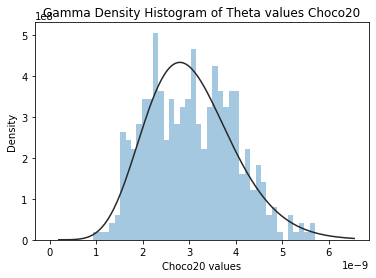

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


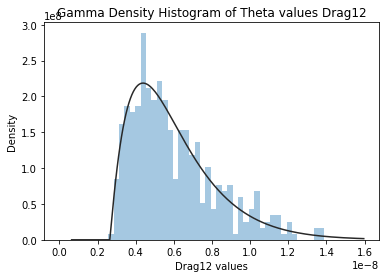

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


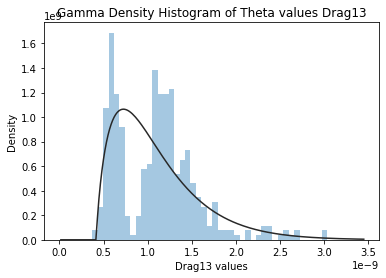

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


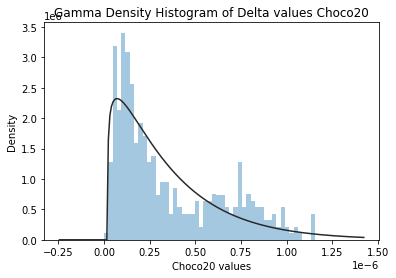

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


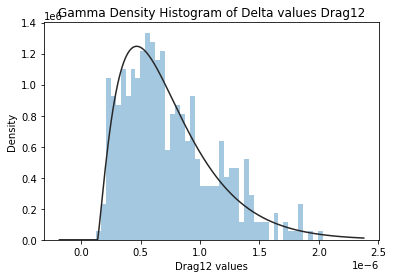

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


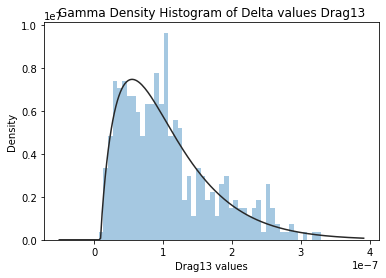

In [ ]:
#Theta adn delta kde/gaussian.
get_1dgamma(taverages_Choco20,'Choco20',  'Theta')
get_1dgamma(taverages_Drag12,'Drag12',  'Theta')
get_1dgamma(taverages_Drag13,'Drag13',  'Theta')

get_1dgamma(daverages_Choco20,'Choco20',  'Delta')
get_1dgamma(daverages_Drag12,'Drag12',  'Delta')
get_1dgamma(daverages_Drag13,'Drag13',  'Delta')

In [ ]:
#get_1dkde(taverages_Choco20,398, 'Choco20',  'Theta')
#get_1dkde(taverages_Drag12,415,'Drag12',  'Theta')
#get_1dkde(taverages_Drag13,400,'Drag13',  'Theta')

#get_1dkde(daverages_Choco20,397, 'Choco20',  'Delta')
#get_1dkde(daverages_Drag12,414, 'Drag12',  'Delta')
#get_1dkde(daverages_Drag13,399, 'Drag13',  'Delta')

In [ ]:
#KDE of theta and delta.

#get_2dkde(taverages_Choco20, daverages_Choco20, 'Choco20', 398)
#get_2dkde(taverages_Drag12, daverages_Drag12, 'Drag12', 415)
#get_2dkde(taverages_Drag13, daverages_Drag13, 'Drag13', 400)


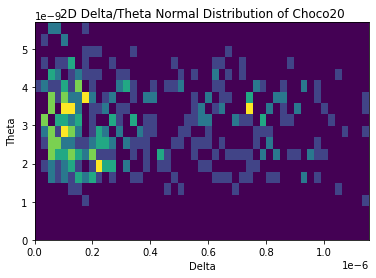

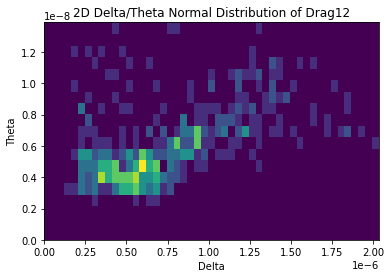

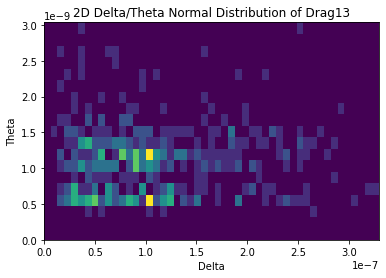

In [ ]:
#2d using theta and delta
get_2dnorm(taverages_Choco20, daverages_Choco20, 397, 'Choco20')
get_2dnorm(taverages_Drag12, daverages_Drag12, 414, 'Drag12')
get_2dnorm(taverages_Drag13, daverages_Drag13, 399, 'Drag13')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


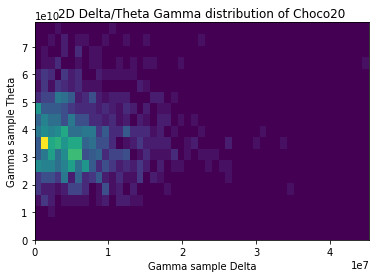

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


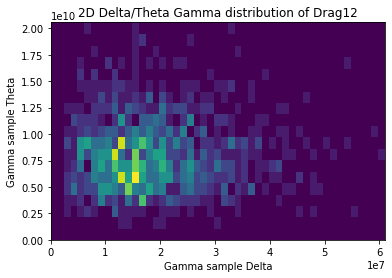

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


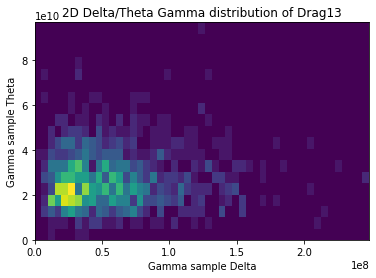

In [ ]:
get_2dgamma(taverages_Choco20, daverages_Choco20, 398, 'Choco20')
get_2dgamma(taverages_Drag12, daverages_Drag12, 415, 'Drag12')
get_2dgamma(taverages_Drag13, daverages_Drag13, 400, 'Drag13')

In [ ]:
#Cross-Validation via MCMC to find optimal KDE BW 1D parameter
from collections import Counter

def get_MCMC(data, row_count, subject):
  theta_resize = []
  for i in range((row_count)):
    theta_resize.append(data[i])
  a = min(theta_resize)
  b = max(theta_resize) 
  N = 1000
  xrand = np.zeros(N)
  for i in range(len(xrand)): 
    xrand[i] = random.uniform(a,b)

  def func(x):
    return np.sin(x) 

  integral = 0.0
  areas = []

  for i in range(N):
    integral += func(xrand[i])
  
    for i in range(len(xrand)):
      xrand = np.zeros(N)

    for i in range(len(xrand)):
      xrand[i] = random.uniform(a,b)
      integral = 0.0
    for i in range(N): 
      integral += func(xrand[i])
  
    answer = (b-a)/float(N)*integral
    areas.append(answer)
  plt.title("distribution of areas calculated")
  plt.hist(areas, bins =30, ec = "black")
  plt.xlabel("Areas")
  
  mode = Counter(areas)
  print(mode.most_common())   # Returns all unique items and their counts
  print(mode.most_common(1))  # Returns the highest occurring item
  return mode 




#get_MCMC(daverages_Choco20, 398, "Choco20")

In [ ]:
#Sampling from a multi dimnensional gaussian. 
import pymc3 as pm
def get_metropolis(data, row_count, subject): 
  data_resize = []
  for i in range((row_count)):
    data_resize.append(data[i])
  with pm.Model():
      mu = pm.Normal('mu', 0, 1)
      sigma = 1.
      returns = pm.Normal('returns', mu=mu, sd=sigma, observed=data_resize)
    
      step = pm.Metropolis()
      trace = pm.sample(15000, step)
    
  sns.distplot(trace[2000:]['mu'], label='PyMC3 sampler');
  #sns.distplot(posterior[500:], label='Hand-written sampler');
  plt.legend();


#get_metropolis(daverages_Choco20, 398, "Choco20")

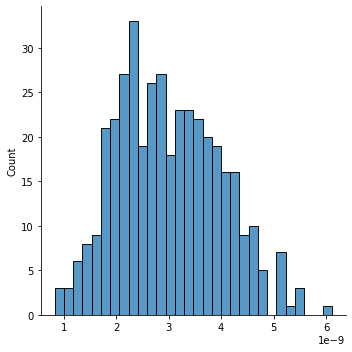

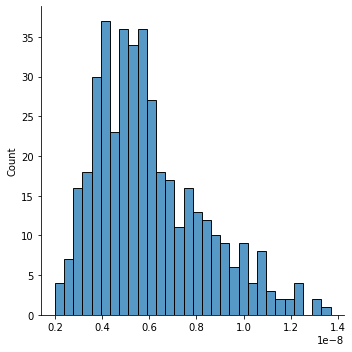

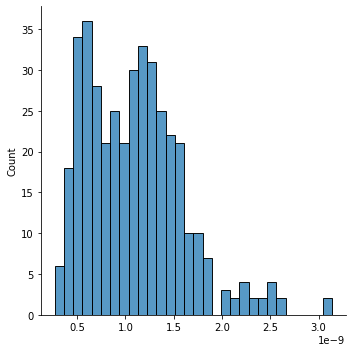

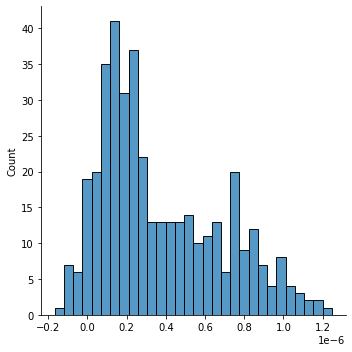

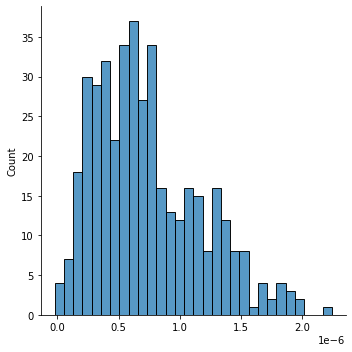

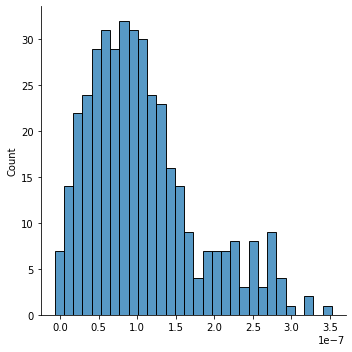

In [ ]:
#using kde.,sample to find better representation
def get_1kdeSample(dataset, sample_counts, row_count, subject):
  data_resize = []
  for i in range(row_count): 
    data_resize.append(dataset[i])
  data = np.array(data_resize)
  data = data.reshape(-1,1)

  params = {'bandwidth': np.logspace(-1, 1, 20)}
  grid = GridSearchCV(KernelDensity(), params)
  grid.fit(data)
  yeet = grid.best_estimator_.bandwidth


  df = pd.DataFrame(dataset)
  yeet = sp.gaussian_kde(data_resize).resample()
  for i in range(len(yeet)): 
    sns.displot(yeet[i], bins = 30) 
    plt.show()
  

get_1kdeSample(taverages_Choco20,1000, 398, "Tchoco20") # 398, 'Choco20')
get_1kdeSample(taverages_Drag12,1000, 415, "Tdrag12") #415, 'Drag12')
get_1kdeSample(taverages_Drag13,1000, 400,"Tdrag13") # 400, 'Drag13')

get_1kdeSample(daverages_Choco20,1000, 398, "Dchoco20") 
get_1kdeSample(daverages_Drag12,1000, 415, "Drag12") 
get_1kdeSample(daverages_Drag13,1000, 400, "Ddrag13") 


In [ ]:
#def gzip_construct(file):
    #with open('Choco20_psd_prestim.csv', 'rb') as f_in:
        #with gzip.open('Choco20_psd_prestim.gz', mode ='wb') as f_out:
            #shutil.copyfileobj(f_in, f_out)
    #return f_out
#yeet = gzip_construct('Choco20_psd_prestim.csv') 
#yote = gzip_construct('Choco20_freq_inds.csv')
#yoin = gzip.GzipFile('Choco20_psd_prestim.csv', 'rb')
#(x_train, y_train), (x_test, y_test) = io.TextIOWrapper(gzip.open(yeet) ,write_through=True)

##  and reshape
#x_train = x_train.reshape(-1, 28, 28, 1) #28 1 1
#x_test = x_test.reshape(-1, 28, 28, 1)#28 1 1

# Lets add sample noise - Salt and Pepper
#noise = augmenters.SaltAndPepper(0.1)
#seq_object = augmenters.Sequential([noise])

#train_x_n = seq_object.augment_images(x_train * 255) / 255
#val_x_n = seq_object.augment_images(x_test * 255) / 255

# input layer
#input_layer = Input(shape=(28, 28, 1)) #28 1 1

# encoding architecture
#encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
#encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
#encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
#encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
#encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
#latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
#decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
#decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
#decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
#decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
#decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
#ecoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
#output_layer   = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(decoded_layer3)

# compile the model
#model = Model(input_layer, output_layer)
#model.compile(optimizer='adam', loss='mse')

# run the model
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
#history = model.fit(train_x_n, x_train, epochs=20, batch_size=2048, validation_data=(val_x_n, x_test), callbacks=[early_stopping])





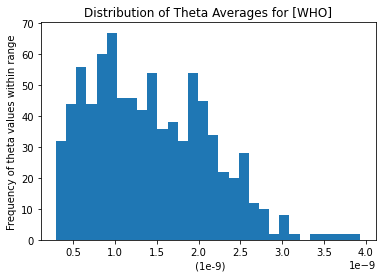

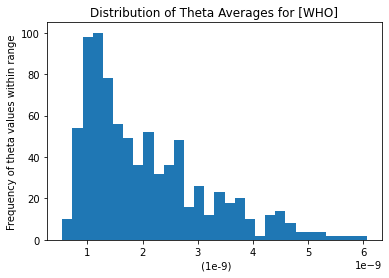

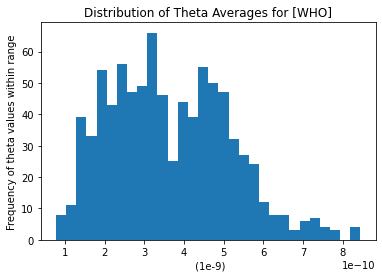

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


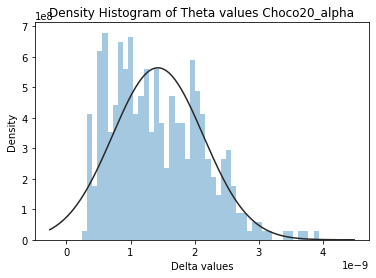

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


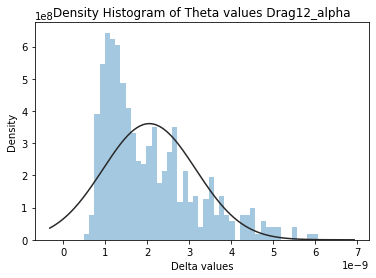

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


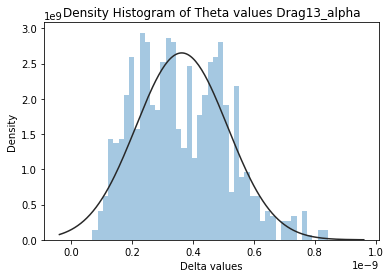

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


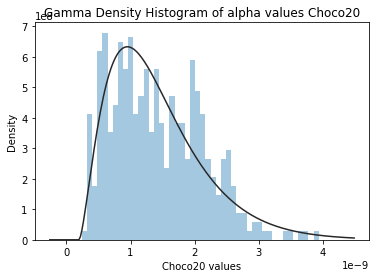

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


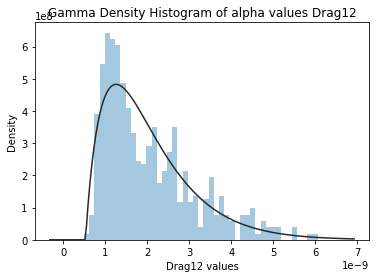

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


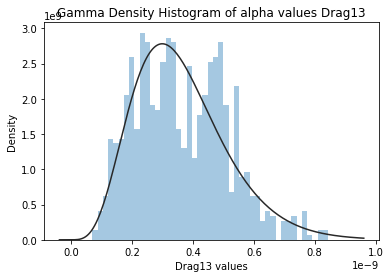

In [ ]:
#Cell for all alpha representations
alpha_averages_Choco20 = []
alpha_averages_Drag12 = []
alpha_averages_Drag13 = []

test_loc_Alpha(df_alpha_Choco20, 1686, 0, 1, alpha_averages_Choco20)
test_loc_Alpha(df_alpha_Drag12, 1660,0,1,alpha_averages_Drag12)
test_loc_Alpha(df_alpha_Drag13, 1680,0,1,alpha_averages_Drag13 )

#histograms
get_histo(alpha_averages_Choco20)
get_histo(alpha_averages_Drag12)
get_histo(alpha_averages_Drag13)


#normal distribution
get_ddistribution(alpha_averages_Choco20, norm, 'Choco20_alpha')
get_ddistribution(alpha_averages_Drag12, norm, 'Drag12_alpha')
get_ddistribution(alpha_averages_Drag13, norm, 'Drag13_alpha')


#gamma distribution
get_1dgamma(alpha_averages_Choco20,'Choco20', 'alpha')
get_1dgamma(alpha_averages_Drag12, 'Drag12', 'alpha')
get_1dgamma(alpha_averages_Drag13, 'Drag13', 'alpha')

#kde (kde plots not configured.)
#sns.kdeplot(data =alpha_averages_Choco20)

In [ ]:
#Cell for all beta representations
beta_averages_Choco20 = []
beta_averages_Drag12 = []
beta_averages_Drag13 = []

test_loc_Alpha(df_beta_Choco20, 1688, 0, 1, beta_averages_Choco20)
test_loc_Alpha(df_beta_Drag12, 1594,0,1,beta_averages_Drag12)
test_loc_Alpha(df_beta_Drag13, 1614,0,1,beta_averages_Drag13 )

#histograms
get_histo(beta_averages_Choco20)
get_histo(beta_averages_Drag12)
get_histo(beta_averages_Drag13)

#normal distribution
get_ddistribution(beta_averages_Choco20, norm, 'Choco20_alpha')
get_ddistribution(beta_averages_Drag12, norm, 'Drag12_alpha')
get_ddistribution(beta_averages_Drag13, norm, 'Drag13_alpha')


#gamma distribution
get_1dgamma(beta_averages_Choco20,'Choco20', 'beta')
get_1dgamma(beta_averages_Drag12, 'Drag12', 'beta')
get_1dgamma(beta_averages_Drag13, 'Drag13', 'beta')

In [ ]:
#Cell for all Low Gamma representations
Low_Gamma_averages_Choco20 = []
Low_Gamma_averages_Drag12 = []
Low_Gamma_averages_Drag13 = []

test_loc_Alpha(df_Low_Gamma_Choco20, 844, 0, 1, Low_Gamma_averages_Choco20)
test_loc_Alpha(df_Low_Gamma_Drag12, 830,0,1,Low_Gamma_averages_Drag12)
test_loc_Alpha(df_Low_Gamma_Drag13, 840,0,1,Low_Gamma_averages_Drag13 )


#histograms
get_histo(Low_Gamma_averages_Choco20)
get_histo(Low_Gamma_averages_Drag12)
get_histo(Low_Gamma_averages_Drag13)

#normal distribution
get_ddistribution(Low_Gamma_averages_Choco20, norm, 'Choco20_Low_Gamma')
get_ddistribution(Low_Gamma_averages_Drag12, norm, 'Drag12_Low_Gamma')
get_ddistribution(Low_Gamma_averages_Drag13, norm, 'Drag13_Low_Gamma')


#gamma distribution
get_1dgamma(Low_Gamma_averages_Choco20,'Choco20', 'Low Gamma')
get_1dgamma(Low_Gamma_averages_Drag12, 'Drag12', 'LowGamma')
get_1dgamma(Low_Gamma_averages_Drag13, 'Drag13', 'Low Gamma')

In [ ]:
def parity(x: int) -> int:  #0 is odd  1 is even. 
  result = 0
  while x:  
    result ^= 1
    x&= x-1 
  return result

yeet = parity(22)
print(yeet)

1
